<a href="https://colab.research.google.com/github/eunzzae/FC_Project_essay/blob/main/ML%EC%BA%90%EA%B8%80%ED%94%8C%EC%A0%9D_%EC%97%90%EC%84%B8%EC%9D%B4%ED%92%88%EC%A7%88%EC%98%88%EC%B8%A1_EDA_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


data_path = '/content/drive/MyDrive/Colab Notebooks/data/essay_quality/'

df_train_data = pd.read_csv(data_path+'train_logs.csv')
df_train_scores = pd.read_csv(data_path+'train_scores.csv')
df_test_data= pd.read_csv(data_path+'test_logs.csv')
df_sub = pd.read_csv(data_path+'sample_submission.csv')

In [34]:
# config
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

pd.set_option('display.max_columns', None)

# random seed
my_random_seed = 180

# Import

In [35]:
# import training data
t1=time.time()
t2=time.time()
print('Elapsed time [s]:', np.round(t2-t1,4))
df_train_data.head(10)

Elapsed time [s]: 0.0001


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
5,001519c8,6,107296,107400,104,Input,q,q,q,3,1
6,001519c8,7,107469,107596,127,Input,q,q,q,4,1
7,001519c8,8,107659,107766,107,Input,q,q,q,5,1
8,001519c8,9,107743,107852,109,Input,q,q,q,6,1
9,001519c8,10,107840,107978,138,Input,Space,Space,,7,1


In [36]:
# show structure
df_train_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   id               8405898 non-null  object
 1   event_id         8405898 non-null  int64 
 2   down_time        8405898 non-null  int64 
 3   up_time          8405898 non-null  int64 
 4   action_time      8405898 non-null  int64 
 5   activity         8405898 non-null  object
 6   down_event       8405898 non-null  object
 7   up_event         8405898 non-null  object
 8   text_change      8405898 non-null  object
 9   cursor_position  8405898 non-null  int64 
 10  word_count       8405898 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [37]:
# basic stats
df_train_data.describe(include='all')

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
count,8405898,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06,8405898,8405898,8405898,8405898,8.405898e+06,8.405898e+06
unique,2471,NaN,NaN,NaN,NaN,50,131,130,4111,NaN,NaN
top,d3fef198,NaN,NaN,NaN,NaN,Input,q,q,q,NaN,NaN
freq,12876,NaN,NaN,NaN,NaN,6726796,5365319,5364789,6128208,NaN,NaN
mean,NaN,2.067649e+03,7.935603e+05,7.936584e+05,9.808498e+01,NaN,NaN,NaN,NaN,1.222964e+03,2.314687e+02
std,NaN,1.588284e+03,5.149451e+05,5.149428e+05,2.533985e+02,NaN,NaN,NaN,NaN,9.485242e+02,1.759088e+02
min,NaN,1.000000e+00,1.060000e+02,2.520000e+02,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,8.520000e+02,3.731842e+05,3.732820e+05,6.600000e+01,NaN,NaN,NaN,NaN,4.990000e+02,9.600000e+01
50%,NaN,1.726000e+03,7.208860e+05,7.209800e+05,9.300000e+01,NaN,NaN,NaN,NaN,1.043000e+03,2.000000e+02
75%,NaN,2.926000e+03,1.163042e+06,1.163141e+06,1.220000e+02,NaN,NaN,NaN,NaN,1.706000e+03,3.270000e+02


In [38]:
# categorical features
print(df_train_data.activity.value_counts())
print()
print(df_train_data.down_event.value_counts())
print()
print(df_train_data.up_event.value_counts())
print()
print(df_train_data.text_change.value_counts())

Input                                     6726796
Remove/Cut                                 970158
Nonproduction                              703851
Replace                                      4448
Paste                                         599
Move From [1306, 1371] To [1061, 1126]          2
Move From [13, 65] To [9, 61]                   1
Move From [274, 314] To [299, 339]              1
Move From [624, 625] To [845, 846]              1
Move From [1861, 2063] To [1766, 1968]          1
Move From [1766, 1968] To [1861, 2063]          1
Move From [2091, 2179] To [252, 340]            1
Move From [923, 1077] To [340, 494]             1
Move From [0, 1] To [590, 591]                  1
Move From [999, 1000] To [1000, 1001]           1
Move From [0, 75] To [1, 76]                    1
Move From [1651, 1769] To [1565, 1683]          1
Move From [61, 136] To [0, 75]                  1
Move From [623, 632] To [624, 633]              1
Move From [75, 134] To [304, 363]               1


In [39]:
# import training labels
df_train_scores.head(10)

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0
5,0081af50,2.0
6,0093f095,4.5
7,009e23ab,4.0
8,00e048f1,3.5
9,00e1f05a,4.5


In [40]:
# read submission template
df_sub.head()

,id,score
0,0000aaaa,1.0
1,2222bbbb,2.0
2,4444cccc,3.0


In [41]:
# read test data
df_test_data

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,0000aaaa,1,338433,338518,85,Input,Space,Space,,0,0
1,0000aaaa,2,760073,760160,87,Input,Space,Space,,1,0
2,2222bbbb,1,711956,712023,67,Input,q,q,q,0,1
3,2222bbbb,2,290502,290548,46,Input,q,q,q,1,1
4,4444cccc,1,635547,635641,94,Input,Space,Space,,0,0
5,4444cccc,2,184996,185052,56,Input,q,q,q,1,1


# 통계

In [42]:
# numerical representations of categorical data

# function for converting activities to integers
def map_act_code(i_activity):
    result = -1
    if i_activity == 'Input':
        result = 1
    elif i_activity == 'Remove/Cut':
        result = 2
    elif i_activity == 'Nonproduction':
        result = 3
    elif i_activity == 'Replace':
        result = 4
    elif i_activity == 'Paste':
        result = 5
    else:
        result = 0

    return result

df_train_data['activity_num'] = df_train_data['activity'].apply(map_act_code)
print(df_train_data.activity_num.value_counts())

1    6726796
2     970158
3     703851
4       4448
5        599
0         46
Name: activity_num, dtype: int64


In [43]:
# other features
df_train_data['act_x_time'] = df_train_data['activity_num'] * df_train_data['action_time']

In [44]:
# a few basic aggregations
df_train_group = df_train_data.groupby(by='id', as_index=False).agg(
    max_event_id = pd.NamedAgg(column='event_id', aggfunc=max),
    mean_action_time = pd.NamedAgg(column='action_time', aggfunc=np.mean),
    sd_action_time = pd.NamedAgg(column='action_time', aggfunc=np.std),
    max_action_time = pd.NamedAgg(column='action_time', aggfunc=max),
    sum_action_time = pd.NamedAgg(column='action_time', aggfunc=sum),
    max_up_time = pd.NamedAgg(column='up_time', aggfunc=max),
    max_word_count = pd.NamedAgg(column='word_count', aggfunc=max),
    mean_activity = pd.NamedAgg(column='activity_num', aggfunc=np.mean),
    sd_activity = pd.NamedAgg(column='activity_num', aggfunc=np.std),
    mean_act_x_time = pd.NamedAgg(column='act_x_time', aggfunc=np.mean))

In [45]:
# show results
df_train_group

,id,max_event_id,mean_action_time,sd_action_time,max_action_time,sum_action_time,max_up_time,max_word_count,mean_activity,sd_activity,mean_act_x_time
0,001519c8,2557,116.246774,91.797374,2259,297243,1801969,256,1.263981,0.554118,145.096989
1,0022f953,2454,112.221271,55.431189,1758,275391,1788969,323,1.315811,0.656196,133.284841
2,0042269b,4136,101.837766,82.383766,3005,421201,1771669,404,1.195841,0.502321,126.665619
3,0059420b,1556,121.848329,113.768226,806,189596,1404469,206,1.228792,0.561664,138.362468
4,0075873a,2531,123.943896,62.082013,701,313702,1662472,252,1.261162,0.499949,145.348479
...,...,...,...,...,...,...,...,...,...,...,...
2466,ffb8c745,4739,105.437856,63.622575,3323,499670,1791649,461,1.283604,0.534349,121.966871
2467,ffbef7e5,2604,82.266129,36.178818,1144,214221,1799174,438,1.137865,0.484689,89.038402
2468,ffccd6fd,3063,75.605615,63.494975,564,231580,1959363,201,1.111002,0.425455,84.464577
2469,ffec5b38,3242,89.277915,54.515788,1388,289439,1508504,413,1.128933,0.395168,99.101172


In [46]:
# add scores to training data
df_train = df_train_group.merge(right=df_train_scores)
df_train.head(10)

,id,max_event_id,mean_action_time,sd_action_time,max_action_time,sum_action_time,max_up_time,max_word_count,mean_activity,sd_activity,mean_act_x_time,score
0,001519c8,2557,116.246774,91.797374,2259,297243,1801969,256,1.263981,0.554118,145.096989,3.5
1,0022f953,2454,112.221271,55.431189,1758,275391,1788969,323,1.315811,0.656196,133.284841,3.5
2,0042269b,4136,101.837766,82.383766,3005,421201,1771669,404,1.195841,0.502321,126.665619,6.0
3,0059420b,1556,121.848329,113.768226,806,189596,1404469,206,1.228792,0.561664,138.362468,2.0
4,0075873a,2531,123.943896,62.082013,701,313702,1662472,252,1.261162,0.499949,145.348479,4.0
5,0081af50,2211,81.404342,40.653054,1102,179985,1778916,275,1.225690,0.501753,98.789236,2.0
6,0093f095,1765,109.717847,37.018331,501,193652,1768197,242,1.122380,0.382116,120.155807,4.5
7,009e23ab,2353,90.755631,41.934952,803,213548,1799303,308,1.227369,0.556867,104.147471,4.0
8,00e048f1,1585,75.011356,33.244615,613,118893,1797498,223,1.126183,0.402614,83.261199,3.5
9,00e1f05a,7826,93.343215,198.896690,11017,730504,1853697,739,1.245719,0.499006,122.082545,4.5


In [47]:
# numerical representations of categorical data
df_test_data['activity_num'] = df_test_data['activity'].apply(map_act_code)

# other features
df_test_data['act_x_time'] = df_test_data['activity_num'] * df_test_data['action_time']

# a few basic aggregations
df_test = df_test_data.groupby(by='id', as_index=False).agg(
    max_event_id = pd.NamedAgg(column='event_id', aggfunc=max),
    mean_action_time = pd.NamedAgg(column='action_time', aggfunc=np.mean),
    sd_action_time = pd.NamedAgg(column='action_time', aggfunc=np.std),
    max_action_time = pd.NamedAgg(column='action_time', aggfunc=max),
    sum_action_time = pd.NamedAgg(column='action_time', aggfunc=sum),
    max_up_time = pd.NamedAgg(column='up_time', aggfunc=max),
    max_word_count = pd.NamedAgg(column='word_count', aggfunc=max),
    mean_activity = pd.NamedAgg(column='activity_num', aggfunc=np.mean),
    sd_activity = pd.NamedAgg(column='activity_num', aggfunc=np.std),
    mean_act_x_time = pd.NamedAgg(column='act_x_time', aggfunc=np.mean))

In [48]:
# show results
df_test

,id,max_event_id,mean_action_time,sd_action_time,max_action_time,sum_action_time,max_up_time,max_word_count,mean_activity,sd_activity,mean_act_x_time
0,0000aaaa,2,86.0,1.414214,87,172,760160,0,1.0,0.0,86.0
1,2222bbbb,2,56.5,14.849242,67,113,712023,1,1.0,0.0,56.5
2,4444cccc,2,75.0,26.870058,94,150,635641,1,1.0,0.0,75.0


# Features

In [49]:
# numerical features
features_num = ['mean_action_time', 'sd_action_time', 'max_action_time',
                'max_up_time', 'sum_action_time', 'max_word_count',
                'mean_activity', 'sd_activity',
                'mean_act_x_time']

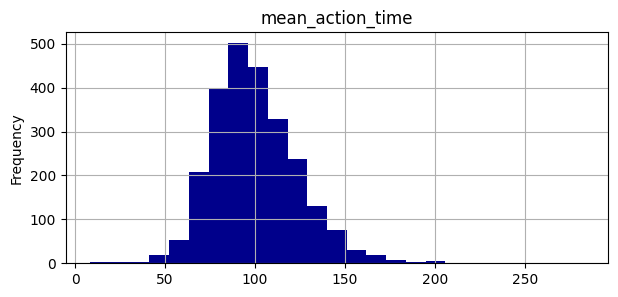

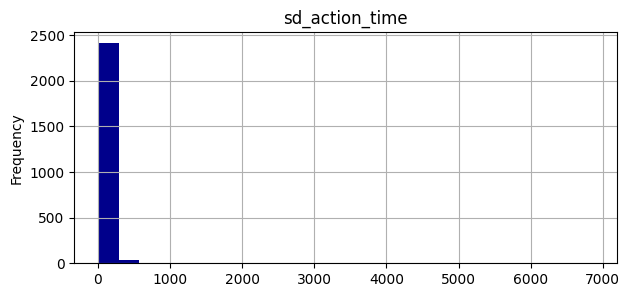

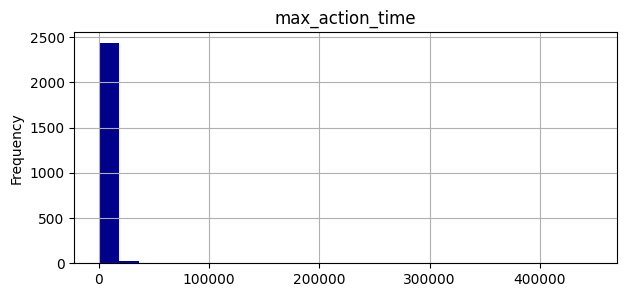

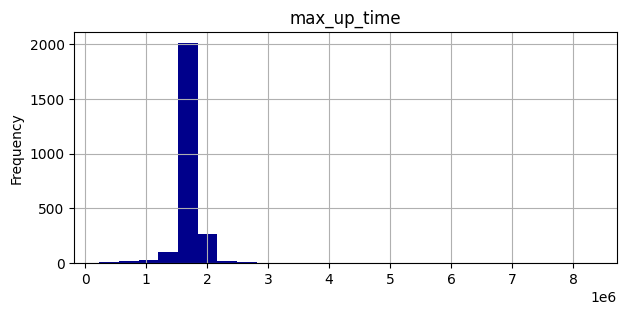

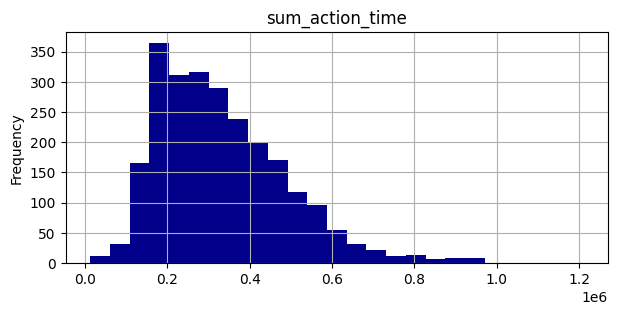

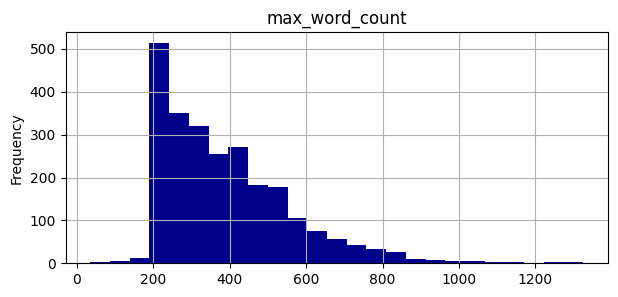

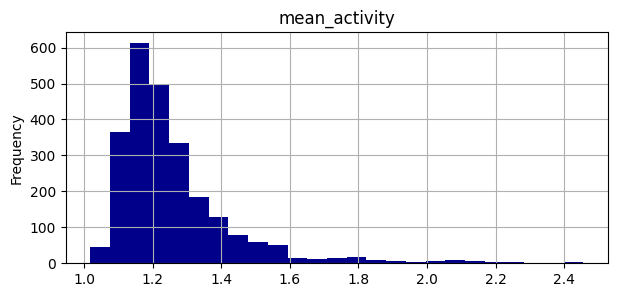

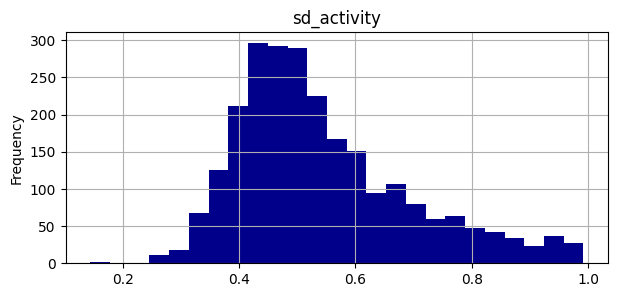

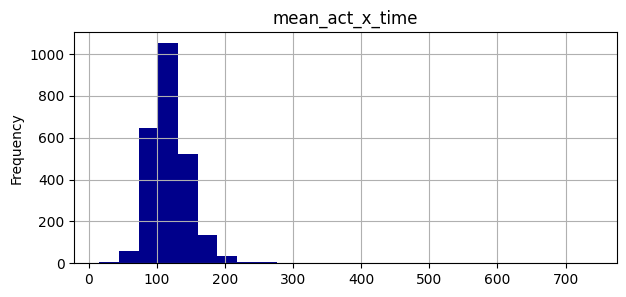

In [50]:
# plot distributions of features
for f in features_num:
    plt.figure(figsize=(7,3))
    df_train[f].plot(kind='hist', bins=25,
                     color=default_color_1)
    plt.title(f)
    plt.grid()
    plt.show()

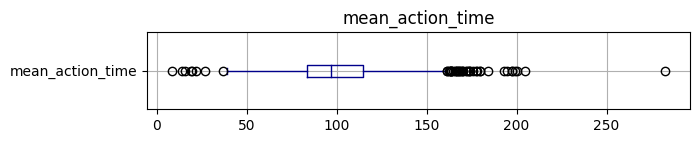

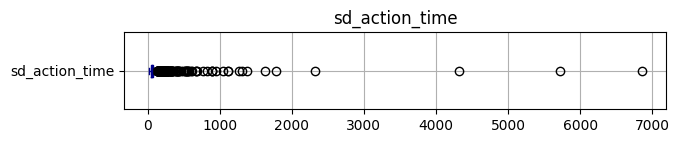

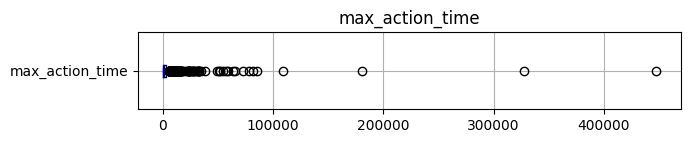

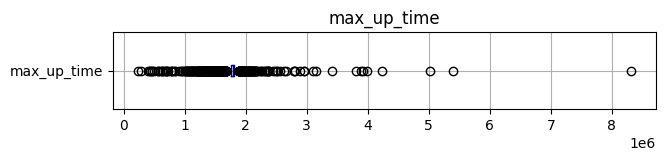

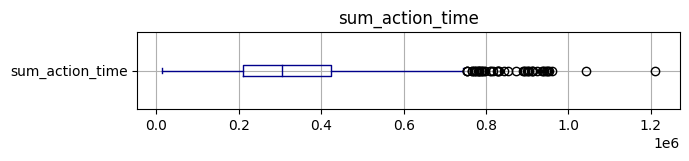

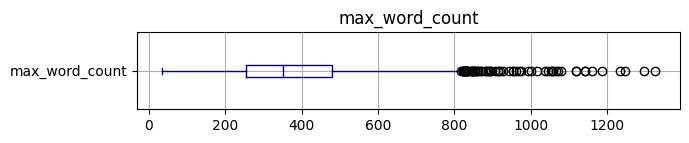

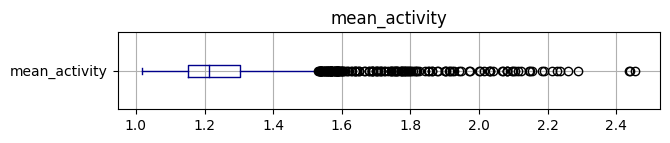

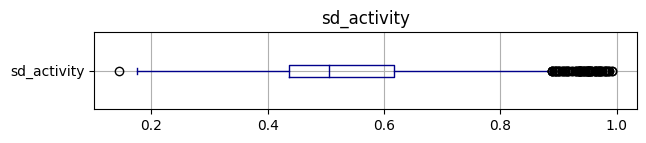

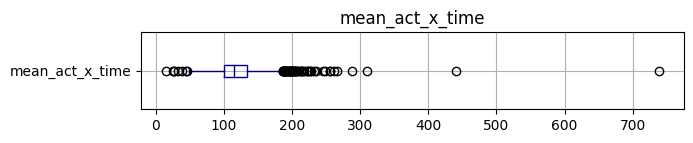

In [51]:
# same using boxplots
for f in features_num:
    plt.figure(figsize=(7,1))
    df_train[f].plot(kind='box', vert=False,
                     color=default_color_1)
    plt.title(f)
    plt.grid()
    plt.show()

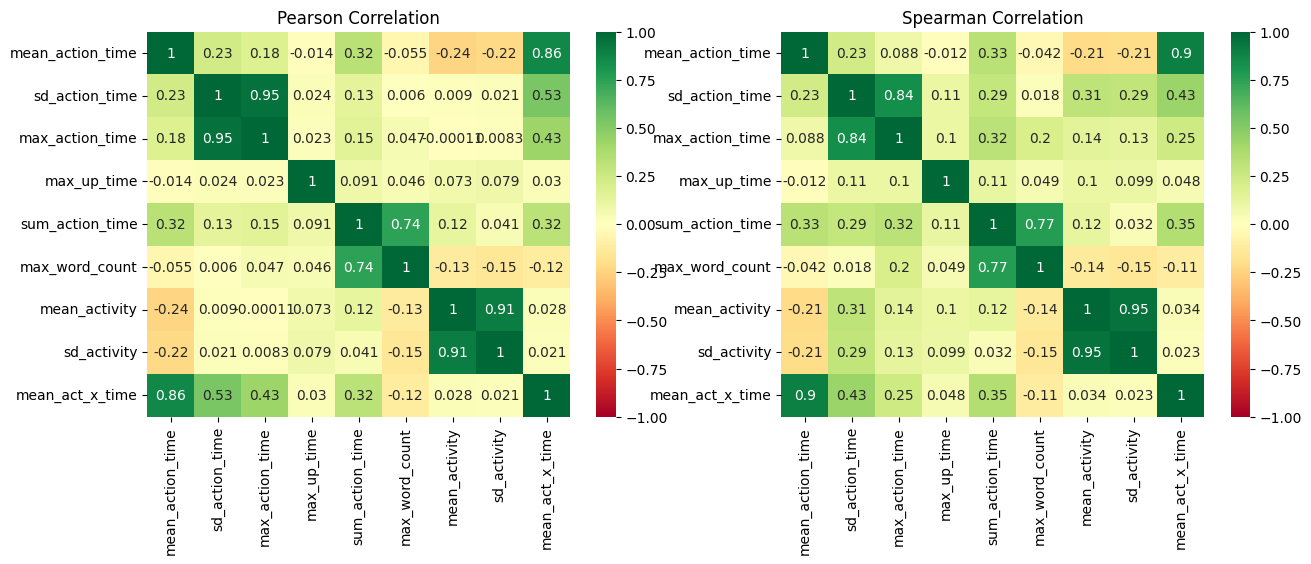

In [52]:
# show correlations of features
corr_pearson = df_train[features_num].corr(method='pearson')
corr_spearman = df_train[features_num].corr(method='spearman')

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

# Target

In [53]:
# define target
target = 'score'

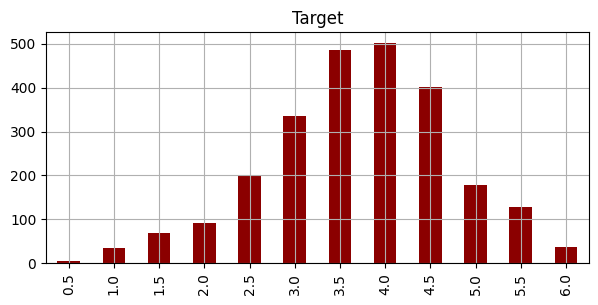

In [54]:
# plot target distribution
plt.figure(figsize=(7,3))
df_train[target].value_counts().sort_index().plot(kind='bar', color=default_color_3)
plt.title('Target')
plt.grid()
plt.show()

#Target vs Features

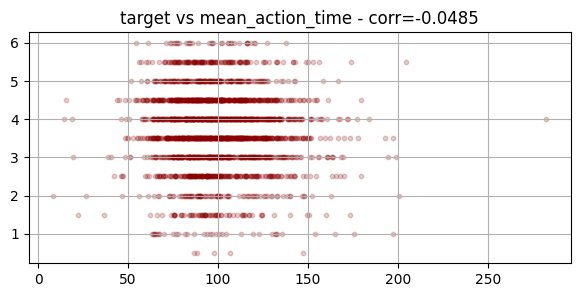

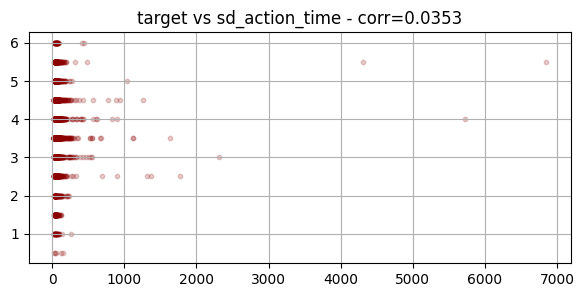

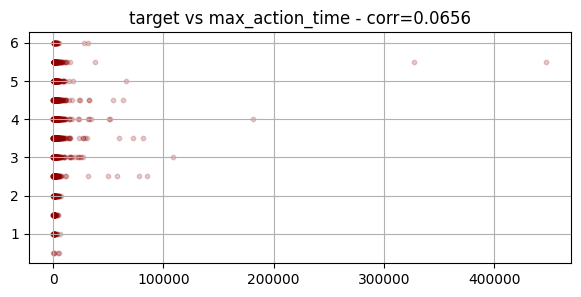

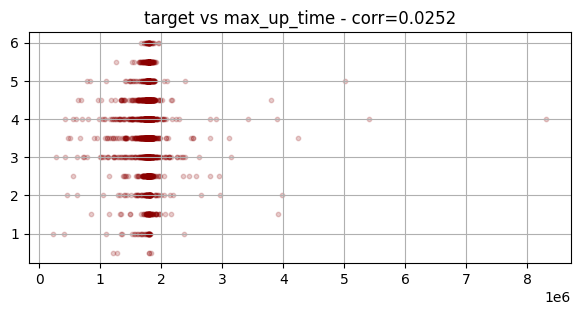

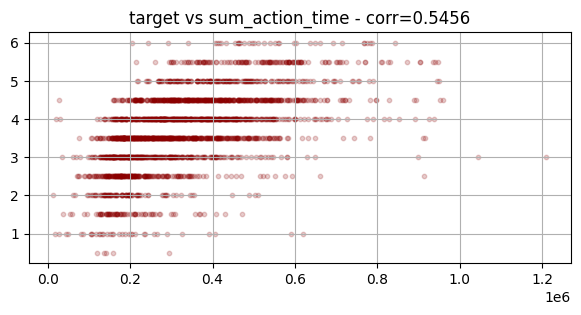

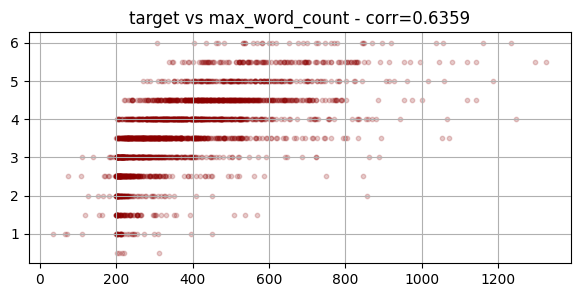

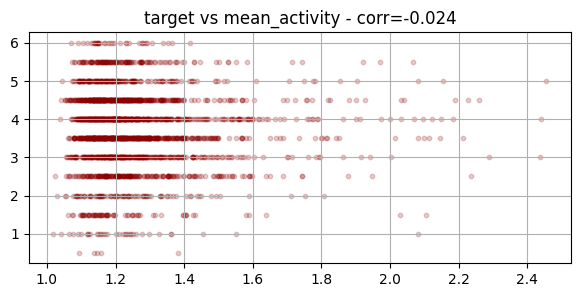

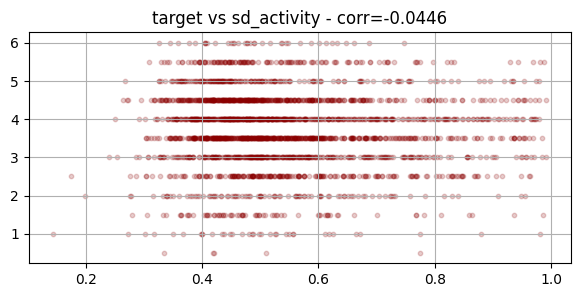

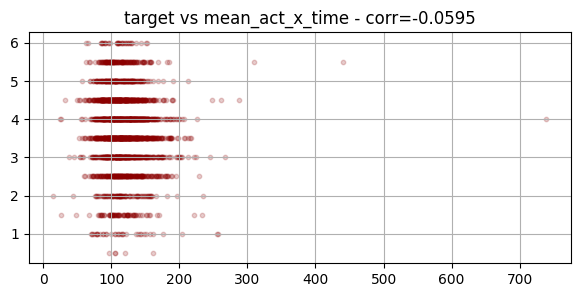

In [55]:
# plot target vs numerical features
for f in features_num:
    plt.figure(figsize=(7,3))
    plt.scatter(df_train[f], df_train[target], color=default_color_3,
                s=10, alpha=0.2)
    c = np.round(df_train[f].corr(df_train[target]),4)
    plt.title('target vs ' + f + ' - corr=' + str(c))
    plt.grid()
    plt.show()